# Student Attendance Project by Robin-1710991932

### importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Reading the csv file.
#### Here, I have used 'unicode_escape' encoding because utf-8 doesn't work for this file.

In [3]:
df = pd.read_csv('./BA_Project.csv', encoding = 'unicode_escape')
df.head()

,Serial Number,Roll_Num,Uni_ID,Student Name,AML3201,CSL2301,CSL3307,CSL4207,CSL4208,CSL4305,...,GEW1608,GEW1609,GEW1610,GEW1611,GEW1613,AMP1201,CSP1307,CSP2210,ECP1311,Total
0,1,10123411,20012001,AAA AAA1,,81.82,,91.55,87.72,,...,,,,,,,,,,83.87
1,2,10123412,20012002,AAA AAA2,93.33,90,,77.19,86.21,,...,,,,100,,86.67,,81.97,,85.56
2,3,10123413,20012003,AAA AAA3,71.11,76.67,,75.44,74.14,,...,,,,,,86.67,,75.41,,77.56
3,4,10123414,20012004,AAA AAA4,,78.79,,81.69,85.96,,...,,,,,,,,,,84.79
4,5,10123415,20012005,AAA AAA5,,78.79,,85.92,82.46,,...,,,,,,,,,,84.56


### Making a list column with the names of all the columns
#### I made a list of a list of all column names and uses regex to replace the special character at the front of every columm name.

In [4]:
columns = [i.replace('\xa0','') for i in df.columns]

### Here, I deleted the first four columns becuase they don't contains the attendance data.

In [5]:
del columns[:4]

### Replacing the empty values with 0
#### Here, I replace empty values in dataframe with 0 to make the calculation easier.

In [6]:
df = df.replace(r'^\s*$', 0, regex=True)
df.head()

,Serial Number,Roll_Num,Uni_ID,Student Name,AML3201,CSL2301,CSL3307,CSL4207,CSL4208,CSL4305,...,GEW1608,GEW1609,GEW1610,GEW1611,GEW1613,AMP1201,CSP1307,CSP2210,ECP1311,Total
0,1,10123411,20012001,AAA AAA1,0,81.82,0,91.55,87.72,0,...,0,0,0,0,0,0,0,0,0,83.87
1,2,10123412,20012002,AAA AAA2,93.33,90,0,77.19,86.21,0,...,0,0,0,100,0,86.67,0,81.97,0,85.56
2,3,10123413,20012003,AAA AAA3,71.11,76.67,0,75.44,74.14,0,...,0,0,0,0,0,86.67,0,75.41,0,77.56
3,4,10123414,20012004,AAA AAA4,0,78.79,0,81.69,85.96,0,...,0,0,0,0,0,0,0,0,0,84.79
4,5,10123415,20012005,AAA AAA5,0,78.79,0,85.92,82.46,0,...,0,0,0,0,0,0,0,0,0,84.56


### Removing the white spaces in column names
#### Here, I used lambda function to remove all the white spaces in column names and rename them using .rename() function.

In [7]:
df = df.rename(columns=lambda x: x.strip())

### Removing spaces between elements in columns
#### Some elements have white spaces in them because of 'str' data type. So, we have to remove the white spaces to convert them into numeric data type.

In [8]:
for col in columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

### Converting columns type from 'object' to 'numeric'.
#### Some columns have 'object' type by deafult. So, it is necessary to change the types of columns to numeric to work with them.

In [9]:
for col in columns:
    df[col] = df[col].apply(pd.to_numeric)
df.head()

,Serial Number,Roll_Num,Uni_ID,Student Name,AML3201,CSL2301,CSL3307,CSL4207,CSL4208,CSL4305,...,GEW1608,GEW1609,GEW1610,GEW1611,GEW1613,AMP1201,CSP1307,CSP2210,ECP1311,Total
0,1,10123411,20012001,AAA AAA1,NaN,81.82,NaN,91.55,87.72,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.87
1,2,10123412,20012002,AAA AAA2,93.33,90.00,NaN,77.19,86.21,NaN,...,NaN,NaN,NaN,100.0,NaN,86.67,NaN,81.97,NaN,85.56
2,3,10123413,20012003,AAA AAA3,71.11,76.67,NaN,75.44,74.14,NaN,...,NaN,NaN,NaN,NaN,NaN,86.67,NaN,75.41,NaN,77.56
3,4,10123414,20012004,AAA AAA4,NaN,78.79,NaN,81.69,85.96,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.79
4,5,10123415,20012005,AAA AAA5,NaN,78.79,NaN,85.92,82.46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.56


### Selecting student details that have attendance less than 75% even in one subject. (for Theory)
#### I removed last four columns because they are not theory subjects.

In [10]:
Theory = columns[:-5]

###  I have used OR condition here to check if a student have attendance less than 75% even in one subject.
#### At the end of for loop df1 returns the boolean values(True and False). After that df[df1] will accept True values only and changes them .

In [11]:
df1 = df['AML3201'] < 75
for col in Theory:
    df1 = (df1) | (df[col]<75)

df1 = df[df1]

In [28]:
df1.head()

,Serial Number,Roll_Num,Uni_ID,Student Name,AML3201,CSL2301,CSL3307,CSL4207,CSL4208,CSL4305,...,GEW1608,GEW1609,GEW1610,GEW1611,GEW1613,AMP1201,CSP1307,CSP2210,ECP1311,Total
2,3,10123413,20012003,AAA AAA3,71.11,76.67,NaN,75.44,74.14,NaN,...,NaN,NaN,NaN,NaN,NaN,86.67,NaN,75.41,NaN,77.56
6,7,10123417,20012007,AAA AAA7,73.33,76.67,NaN,75.44,75.86,NaN,...,NaN,NaN,NaN,NaN,100.0,80.00,NaN,70.49,NaN,75.78
7,8,10123418,20012008,AAA AAA8,86.67,73.33,NaN,77.19,77.59,NaN,...,NaN,NaN,NaN,100.0,NaN,73.33,NaN,73.77,NaN,78.67
10,11,10123421,20012011,AAA AAA11,86.67,86.67,NaN,73.68,84.48,NaN,...,NaN,NaN,NaN,NaN,NaN,80.00,NaN,77.05,NaN,82.22
13,14,10123424,20012014,AAA AAA14,75.56,73.33,NaN,73.68,74.14,NaN,...,100.0,NaN,NaN,NaN,NaN,66.67,NaN,68.85,NaN,74.00


### Counting the number of rows of students have attendance less than 75% in Theory.

In [13]:
DetainedInTheory = len(df1.index)
DetainedInTheory

303

### Selecting student details that have attendance less than 75% even in one subject. (for Practical)

In [14]:
Practical = columns[-5:-1]

In [15]:
df2 = df['AMP1201'] < 75
for col in Practical:
    df2 = (df2) | (df[col]<75)

df2 = df[df2]

In [16]:
df2.head()

,Serial Number,Roll_Num,Uni_ID,Student Name,AML3201,CSL2301,CSL3307,CSL4207,CSL4208,CSL4305,...,GEW1608,GEW1609,GEW1610,GEW1611,GEW1613,AMP1201,CSP1307,CSP2210,ECP1311,Total
6,7,10123417,20012007,AAA AAA7,73.33,76.67,NaN,75.44,75.86,NaN,...,NaN,NaN,NaN,NaN,100.0,80.00,NaN,70.49,NaN,75.78
7,8,10123418,20012008,AAA AAA8,86.67,73.33,NaN,77.19,77.59,NaN,...,NaN,NaN,NaN,100.0,NaN,73.33,NaN,73.77,NaN,78.67
9,10,10123420,20012010,AAA AAA10,82.22,76.67,NaN,80.70,82.76,NaN,...,NaN,NaN,NaN,NaN,NaN,80.00,NaN,73.77,NaN,80.67
13,14,10123424,20012014,AAA AAA14,75.56,73.33,NaN,73.68,74.14,NaN,...,100.0,NaN,NaN,NaN,NaN,66.67,NaN,68.85,NaN,74.00
21,22,10123432,20012022,AAA AAA22,71.11,76.67,NaN,70.18,68.97,NaN,...,NaN,NaN,NaN,NaN,NaN,73.33,NaN,72.13,NaN,74.00


### Counting the number of rows of students have attendance less than 75% in Practical.

In [17]:
DetainedInPractical = len(df2.index)
DetainedInPractical

220

### Making new file "Make up list Theory.csv" for students with attendance less than 75%. (for Theory)

In [18]:
df1.to_csv('Make_Up_List_Theory.csv')

### Making new file "Make up list Practical.csv" for students with attendance less than 75%. (for Practical)

In [19]:
df2.to_csv('Make_Up_List_Practical.csv')

### Making new file "Attendance_OK" for students with attendance greater than 75%.  
#### Here, we compare the dataframes, if the rows are in df1 or df2 they were not included in new_df.

In [20]:
df3 = df[~df.index.isin(df1.index)]

In [21]:
df_new = df3[~df3.index.isin(df2.index)]

In [22]:
df_new.head()

,Serial Number,Roll_Num,Uni_ID,Student Name,AML3201,CSL2301,CSL3307,CSL4207,CSL4208,CSL4305,...,GEW1608,GEW1609,GEW1610,GEW1611,GEW1613,AMP1201,CSP1307,CSP2210,ECP1311,Total
0,1,10123411,20012001,AAA AAA1,NaN,81.82,NaN,91.55,87.72,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.87
1,2,10123412,20012002,AAA AAA2,93.33,90.00,NaN,77.19,86.21,NaN,...,NaN,NaN,NaN,100.0,NaN,86.67,NaN,81.97,NaN,85.56
3,4,10123414,20012004,AAA AAA4,NaN,78.79,NaN,81.69,85.96,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.79
4,5,10123415,20012005,AAA AAA5,NaN,78.79,NaN,85.92,82.46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.56
5,6,10123416,20012006,AAA AAA6,84.44,83.33,NaN,75.44,86.21,NaN,...,NaN,NaN,NaN,100.0,NaN,86.67,NaN,77.05,NaN,82.22


### Counting the number of rows of students have attendance > 75% in all subjects.

In [23]:
AttendanceOk = len(df_new.index)
AttendanceOk

330

In [24]:
df_new.to_csv('Attendance_OK.csv')

### Plotting a bar graph to show Attendance Data.

In [25]:
Attendance = ['>75', '<75 in Theory', '<75 in Practical']
NumberOfStudents = [DetainedInTheory, DetainedInPractical, AttendanceOk]

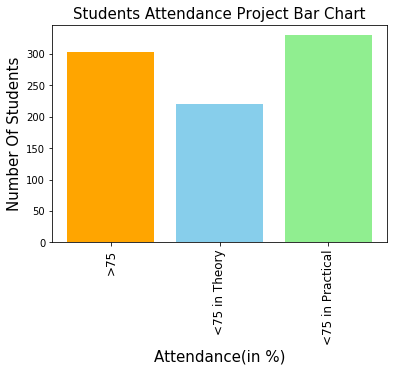

In [26]:
colors = ['orange', 'skyblue', 'lightgreen']
plt.bar(Attendance, NumberOfStudents, color=colors)
plt.xlabel('Attendance(in %)', fontsize=15)
plt.ylabel('Number Of Students', fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.title('Students Attendance Project Bar Chart',fontsize=15)
plt.show()

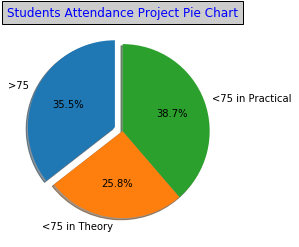

In [27]:
explode= (0.1,0,0)
plt.pie(NumberOfStudents, labels = Attendance, explode=explode, shadow=True, autopct='%1.1f%%',startangle=90)
plt.title('Students Attendance Project Pie Chart',bbox={'facecolor':'0.8', 'pad':5,},color='Blue')
plt.show()